# From [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)

## [Adult dataset](https://archive.ics.uci.edu/ml/datasets/adult)

This data file does not have a header with column names. Look at the ".names" text file in the Data Folder and use the same procedure used for Iris

Print also the types of the columns using the `types` attribute

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation'
         ,'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'high-income']

url = https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

Load the data in the dataframe `df` and then show the column types with the `.dtypes` attribute of a Pandas DataFrame

In [2]:
# Insert your code here

names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation'
         ,'relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country', 'high-income']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url, sep = ',', names = names
#                 , index_col = False # since the first column is integer, without this 
                                     # it would be interpreted as row label
                )
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
high-income       object
dtype: object


Show the head and then generate the histograms for all the columns

In [3]:
# Insert your code here
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,high-income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016859DA6A48>,
      dtype=object)

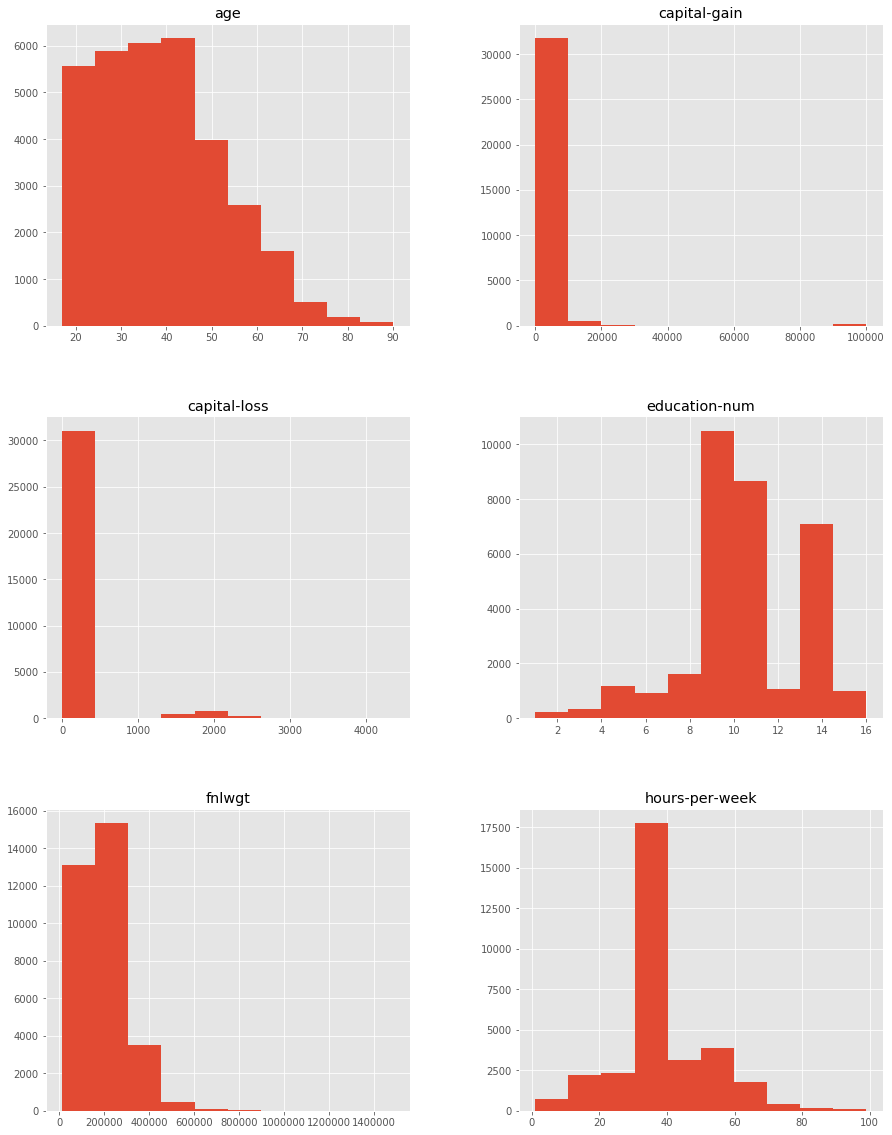

In [7]:
# Insert your code here
pd.DataFrame.hist(df,figsize=(15,20))

Show a bar graph with the value counts of the attribute `high-income`.
Use the method `value_counts` of Pandas, then `plot` with the option `kind = 'bar'`

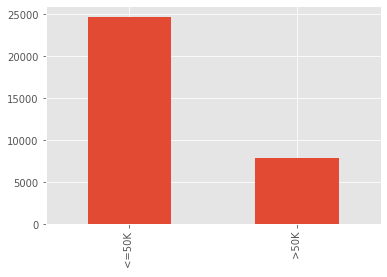

In [8]:
# Insert your code here
df['high-income'].value_counts().sort_index().plot(kind='bar')

### More examples of figures
Boxplot

[More on boxplots](https://upload.wikimedia.org/wikipedia/commons/8/89/Boxplot_vs_PDF.png)

Use the [`boxplot` method](https://seaborn.pydata.org/generated/seaborn.boxplot.html) of Seaborn with `hours-per-week` in the `x` axis and `high-income` in the `y` axis. The columns are extracted with the `loc` method of Pandas DataFrames, with index expression `[:,'attribute-name']` (means all the elements of column `attribute-name`)



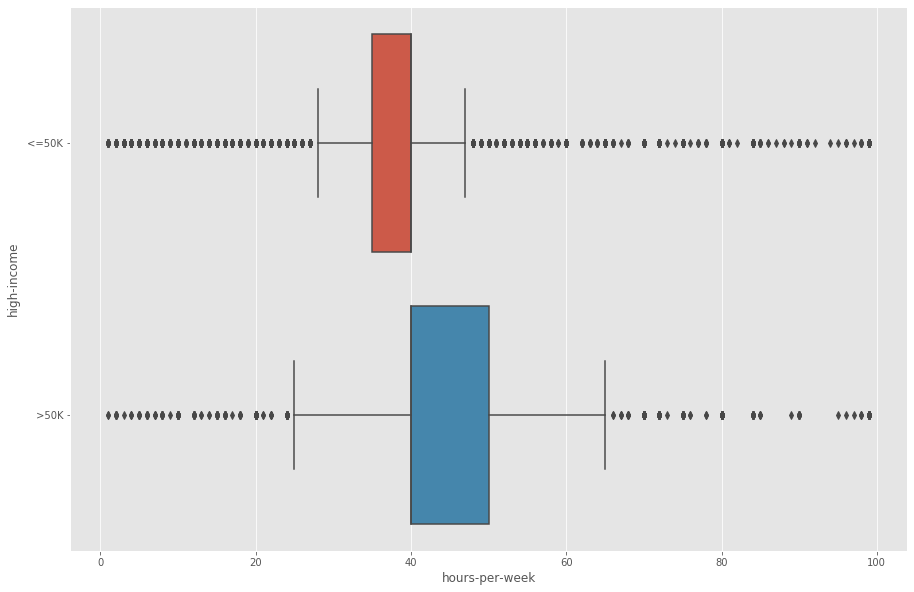

In [12]:
# Insert your code here
plt.figure(figsize = [15,10])
sns.boxplot(x='hours-per-week',y='high-income',data=df)

Similar boxplot for `'capital-loss'` and `'high-income']`

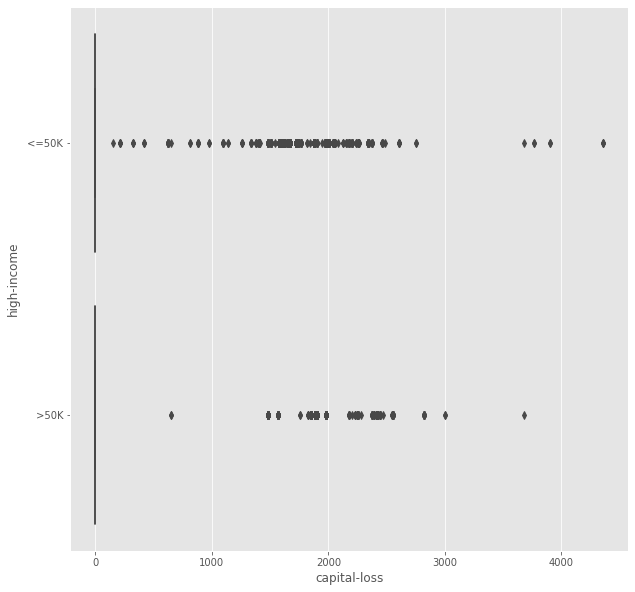

In [19]:
# Insert your code here
plt.figure(figsize = [10,10])
sns.boxplot(x=df.loc[:,'capital-loss'], y=df.loc[:,'high-income'])

Something is wrong, the figure does not look like a proper boxplot.

Let's look at the **capital-loss** column with the `describe` method

In [14]:
# Insert your code here
df['capital-loss'].describe()

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

The three quartiles are all zero, and there are no left outliers.

Let's try with a logarithmic transformation (add +1 to deal with the zero values)
- use the `log10` function of `numpy` to transform the `capital-loss`+1
- prepare a plot figure of size [10,10]
- boxplot with Seaborn

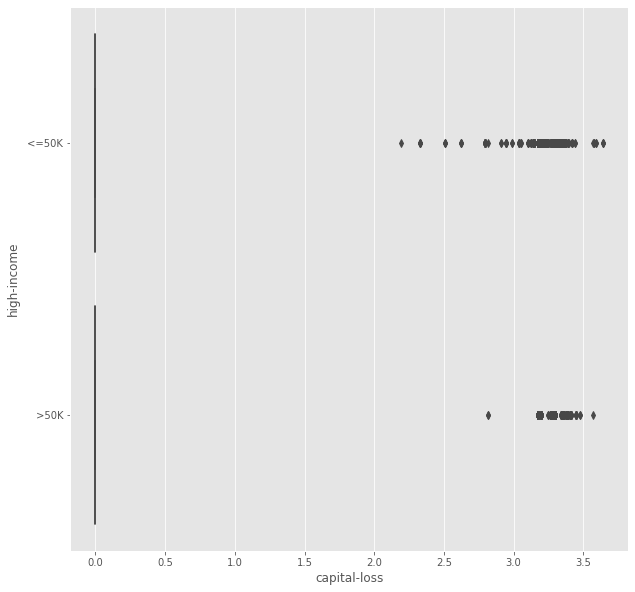

In [16]:
# Insert your code here
from numpy import log10
plt.figure(figsize = [10,10])
sns.boxplot(x=log10(df.loc[:,'capital-loss']+1), y=df.loc[:,'high-income'])

You can observe that a most of the data are 'compressed' at 0
- it is due to the zero values to which we added 1, whose log is 0 again

Look at the rows with non-zero values: in the x values, instead of the `:` indicating 'all the rows' we must use a 'selector expression', in this case `df['capital-loss']!=0`

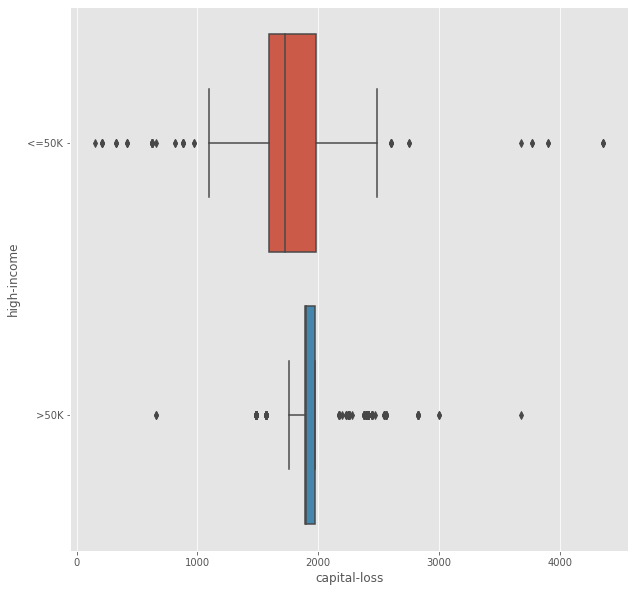

In [17]:
# Insert your code here
plt.figure(figsize = [10,10])
sns.boxplot(x=df.loc[df['capital-loss']!=0,'capital-loss'], y=df.loc[:,'high-income'])

Now we see that the non-zero values have some structure

### Plot another pair of columns
`education-num` and `high-income`

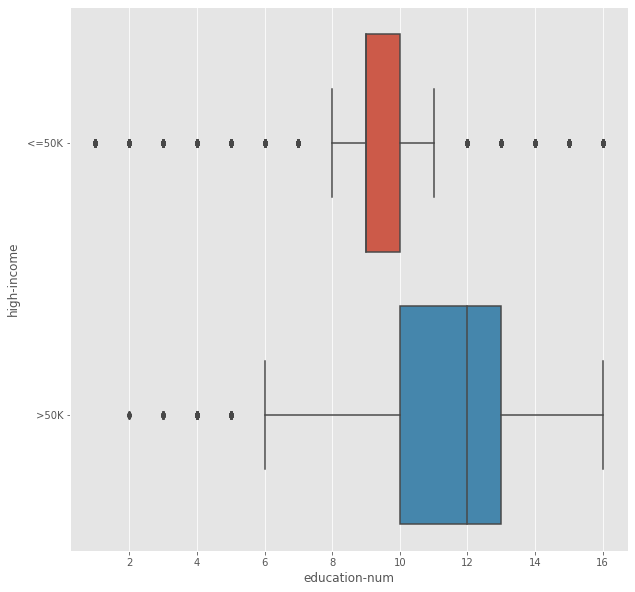

In [18]:
# Insert your code here
plt.figure(figsize = [10,10])
sns.boxplot(x=df.loc[:,'education-num'], y=df.loc[:,'high-income'])